In [1]:
your_local_path = "C:/Users/sylve/Downloads/Machine learning/Dataset/Project datasets modified/Predicting Food Delivery Time Hackathon/"

In [2]:

from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [46]:
pd.set_option('display.max_rows', 12000)
pd.set_option('display.max_columns', 200)


In [11]:
df1 = pd.read_excel(your_local_path+"Data_Train.xlsx")

In [12]:
df2 = pd.read_excel(your_local_path+"Data_Test.xlsx")

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.1+ KB


In [14]:
df1['Average_Cost_Rupees']=df1['Average_Cost'].str.replace(",", "")

In [15]:
df1['Average_Cost_Rupees']=df1['Average_Cost_Rupees'].map(lambda x: x.lstrip('₹'))
df1['Minimum_Order_Rupees']=df1['Minimum_Order'].map(lambda x: x.lstrip('₹'))

In [16]:
df1['Delivery_Time'].unique()

array(['30 minutes', '65 minutes', '45 minutes', '10 minutes',
       '20 minutes', '120 minutes', '80 minutes'], dtype=object)

In [17]:
cleanup_num={'Delivery_Time':{'30 minutes':30, '65 minutes':65, '45 minutes':45, '10 minutes':10, '20 minutes':20, '120 minutes':120, '80 minutes':80}}
df1.replace(cleanup_num,inplace=True)
df1.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Rupees,Minimum_Order_Rupees
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30,200,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30,100,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65,150,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30,250,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65,200,99


In [28]:
df1['Average_Cost_Rupees'].unique()

array([ 200.,  100.,  150.,  250.,  650.,  350.,  800.,   50.,  400.,
        600.,  300.,  750.,  450.,  550., 1000.,  500.,  900., 1200.,
        950.,  850.,  700., 1150., 1100., 1400., 2050.])

In [19]:
df1['Average_Cost_Rupees'] = pd.to_numeric(df1['Average_Cost_Rupees'],errors='coerce')
df1['Minimum_Order_Rupees'] = pd.to_numeric(df1['Minimum_Order_Rupees'],errors='coerce')
df1['Delivery_Time'] = pd.to_numeric(df1['Delivery_Time'],errors='coerce')

In [27]:
df1['Average_Cost_Rupees'].dropna(inplace=True)

In [30]:
df1.drop(df1[df1['Rating']=='NEW'].index,inplace=True)

In [31]:
df1.drop(df1[df1['Rating']=='Opening Soon'].index,inplace=True)
df1.drop(df1[df1['Rating']=='Temporarily Closed'].index,inplace=True)

In [32]:
df1['Rating'] = pd.to_numeric(df1['Rating'],errors='coerce')
df1['Votes'] = pd.to_numeric(df1['Votes'],errors='coerce')
df1['Reviews'] = pd.to_numeric(df1['Reviews'],errors='coerce')

In [33]:
import itertools
a=[]

In [34]:
for index, row in df1.iterrows():
    s=row["Cuisines"].split(", ")
    a.insert(0,s)
print(type(s))

aa=list(itertools.chain.from_iterable(a))
aa=list(set(aa))
len(aa)


<class 'list'>


101

In [ ]:
print(aa)

In [35]:
df1.describe()

,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Rupees,Minimum_Order_Rupees
count,9131.00000,9018.000000,8782.000000,10322.000000,10322.000000,10322.000000
mean,3.61346,244.494899,123.247893,37.540690,206.190661,53.628560
std,0.41434,555.110059,321.025216,12.742542,132.630229,19.158571
min,2.10000,3.000000,1.000000,10.000000,50.000000,0.000000
25%,3.30000,19.000000,7.000000,30.000000,150.000000,50.000000
50%,3.60000,63.000000,26.000000,30.000000,200.000000,50.000000
75%,3.90000,216.000000,91.000000,45.000000,200.000000,50.000000
max,4.90000,9054.000000,6504.000000,120.000000,2050.000000,500.000000


In [ ]:
print(df1['Cuisines'].str.contains(u'North Indian'))

In [1]:
plt.figure(figsize=(26, 6))
sns.boxplot(x="Reviews",data=df1)

plt.show()

NameError: name 'plt' is not defined

In [104]:
df1.groupby(["Restaurant"]).Restaurant.count()

Restaurant
ID_0        1
ID_100      1
ID_1000     1
ID_1001     1
ID_1003     1
ID_1004     4
ID_1005     1
ID_1006     3
ID_1007     2
ID_1008     1
ID_101      1
ID_1011     1
ID_1012     3
ID_1013     2
ID_1014     1
ID_1015     7
ID_1016     1
ID_1018     1
ID_1019     1
ID_102      1
ID_1020     1
ID_1021     1
ID_1022     1
ID_1025     2
ID_1026     1
ID_1027     1
ID_1028     2
ID_1029     1
ID_103      1
ID_1031     1
ID_1032     3
ID_1033     2
ID_1034     2
ID_1035     2
ID_1036     5
ID_1039     1
ID_104      1
ID_1041     2
ID_1042     5
ID_1043     1
ID_1044     1
ID_1046     2
ID_1047     1
ID_1049     1
ID_105      3
ID_1050     1
ID_1051     2
ID_1052     3
ID_1053     1
ID_1054     1
ID_1055     1
ID_1056     2
ID_1058     1
ID_1059     1
ID_1061     1
ID_1062     1
ID_1063     1
ID_1064     2
ID_1065     1
ID_1067     1
ID_1068     1
ID_1069     1
ID_107      1
ID_1070     1
ID_1071     2
ID_1072     1
ID_1073     2
ID_1074     7
ID_1076     1
ID_1077     1
ID_1078  

In [ ]:
print(X)

In [36]:
df3=df1.copy()

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10322 entries, 0 to 11092
Data columns (total 11 columns):
Restaurant              10322 non-null object
Location                10322 non-null object
Cuisines                10322 non-null object
Average_Cost            10322 non-null object
Minimum_Order           10322 non-null object
Rating                  9131 non-null float64
Votes                   9018 non-null float64
Reviews                 8782 non-null float64
Delivery_Time           10322 non-null int64
Average_Cost_Rupees     10322 non-null float64
Minimum_Order_Rupees    10322 non-null int64
dtypes: float64(4), int64(2), object(5)
memory usage: 967.7+ KB


In [38]:
df3.drop(['Average_Cost','Minimum_Order'],axis=1,inplace=True)

In [40]:
for i in aa:
    df3[i]=0

In [41]:
loclist=df3['Location'].unique()
for i in loclist:
    df3[i]=0

In [43]:
def fi(df3):
    for index, row in df3.iterrows():
        ss=row['Cuisines'].split(", ")
        for i in ss:
            df3[i][index]=1
        si=row['Location']    
        df3[si][index]=1
%time fi(df3)    

D:\install\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\install\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Wall time: 20min 20s


In [47]:
df3.head()

,Restaurant,Location,Cuisines,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Rupees,Minimum_Order_Rupees,Bakery,Thai,Kerala,African,Assamese,Finger Food,Andhra,Awadhi,Portuguese,Indonesian,Hot dogs,Nepalese,Brazilian,Bar Food,Wraps,Sandwich,Bubble Tea,Lucknowi,Mithai,Coffee,Steak,Goan,Chettinad,Tea,Salad,Afghan,Fast Food,Korean,Odia,German,Kashmiri,Kebab,Tex-Mex,Continental,Seafood,Mughlai,Rolls,Tamil,Naga,Parsi,Street Food,Poké,Burmese,Desserts,Sri Lankan,South American,Asian,BBQ,Raw Meats,Vietnamese,Charcoal Chicken,Sushi,Japanese,Bangladeshi,Italian,Paan,Rajasthani,Tibetan,Momos,Lebanese,Bengali,Roast Chicken,Modern Indian,Malwani,Beverages,Mexican,Juices,Hyderabadi,North Eastern,Turkish,Burger,Cantonese,Chinese,Pizza,Spanish,Bihari,Middle Eastern,Maharashtrian,Cafe,North Indian,Malaysian,French,Konkan,Iranian,Mediterranean,Gujarati,Arabian,Bohri,Biryani,Mishti,Greek,Belgian,Indian,Ice Cream,Mangalorean,Frozen Yogurt,Israeli,American,Healthy Food,South Indian,European,"FTI College, Law College Road, Pune","Sector 3, Marathalli",Mumbai Central,"Sector 1, Noida","Rmz Centennial, I Gate, Whitefield",Delhi University-GTB Nagar,"Yerawada, Pune, Maharashtra","Delhi Administration Flats, Timarpur","Moulali, Kolkata","Dockyard Road, Mumbai CST Area",Pune University,"Gora Bazar, Rajbari, North Dumdum, Kolkata","D-Block, Sector 63, Noida","Sector 14, Noida","Mico Layout, Stage 2, BTM Layout,Bangalore","Laxman Vihar Industrial Area, Sector 3A, Gurgoan","Tiretti, Kolkata","Sandhurst Road, Mumbai CST Area","MG Road, Pune","Hyderabad Public School, Begumpet",Majestic,"Chandni Chowk, Kolkata","Delhi High Court, India Gate","Chatta Bazaar, Malakpet, Hyderabad",Delhi Cantt.,"Babarpur, New Delhi, Delhi","Nathan Road, Mangaldas Road, Pune","Panjetan Colony, Malakpet, Hyderabad","Sector 63A,Gurgaon","Raja Bazar, Kolkata","Tejas Nagar Colony, Wadala West, Mumbai","Jaya Nagar, Saidabad, Hyderabad","Noorkhan Bazaar, Malakpet, Hyderabad","Musi Nagar, Malakpet, Hyderabad","BTM Layout 1, Electronic City"
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",3.5,12.0,4.0,30,200.0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",3.5,11.0,4.0,30,100.0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",3.6,99.0,30.0,65,150.0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",3.7,176.0,95.0,30,250.0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",3.2,521.0,235.0,65,200.0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
#print(round(df3.Rating[(df3['Location']== 'FTI College, Law College Road, Pune')&(df3['Average_Cost_Rupees']==100)].mean(),1))
#print(len(df3.Rating[(df3['Location']== 'FTI College, Law College Road, Pune')&(df3['Average_Cost_Rupees']==50)]))
#df3.Rating[(df3['Location']== 'FTI College, Law College Road, Pune')&(df3['Average_Cost_Rupees']==50)].isnull().sum()
#df3.Rating[(df3['Location']== 'FTI College, Law College Road, Pune')&(df3['Average_Cost_Rupees']==50)]=df3.Rating[(df3['Location']== 'FTI College, Law College Road, Pune')&(df3['Average_Cost_Rupees']==50)].fillna(df3.Rating[(df3['Location']== 'FTI College, Law College Road, Pune')&(df3['Average_Cost_Rupees']==50)].mean())

df3.Rating[(df3['Location']== 'FTI College, Law College Road, Pune')&(df3['Average_Cost_Rupees']==50)]

489      3.400000
1334     3.700000
2582     3.423077
3211     3.200000
3907     3.100000
5608     3.700000
6045     3.200000
6066     3.400000
7451     3.423077
8015     3.100000
8174     3.800000
9120     3.500000
9321     3.400000
9840     3.000000
10141    4.000000
10206    3.423077
Name: Rating, dtype: float64

In [74]:
print(df3['Rating'].fillna(df3['Rating'].mean()))

0        3.50000
1        3.50000
2        3.60000
3        3.70000
4        3.20000
5        3.80000
6        3.70000
7        4.00000
8        3.90000
9        3.90000
10       3.80000
11       4.20000
12       3.61346
13       3.80000
14       3.50000
15       3.60000
16       3.61346
17       3.70000
18       3.61346
19       3.70000
20       2.80000
21       3.90000
22       3.00000
23       3.70000
24       3.20000
25       3.61346
26       3.70000
27       3.20000
28       3.30000
29       3.80000
30       3.20000
31       4.00000
32       3.10000
33       3.30000
34       4.00000
35       4.70000
36       3.40000
37       3.60000
38       3.50000
39       3.60000
40       4.00000
41       4.10000
42       3.70000
43       3.70000
44       3.60000
45       3.80000
46       3.40000
48       3.50000
49       3.61346
50       3.10000
51       3.20000
52       3.30000
53       3.90000
54       3.40000
55       3.30000
56       2.90000
57       3.80000
58       3.70000
59       3.100

In [82]:
for i in df3['Location'].unique():
    for j in df3['Average_Cost_Rupees'].unique():
        #print(i,j,round(df3.Rating[(df3['Location']== i)&(df3['Average_Cost_Rupees']==j)].mean(),1))
        df3.Rating[(df3['Location']== i)&(df3['Average_Cost_Rupees']==j)]=df3.Rating[(df3['Location']== i)&(df3['Average_Cost_Rupees']==j)].fillna(df3.Rating[(df3['Location']== i)&(df3['Average_Cost_Rupees']==j)].mean())

D:\install\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [86]:
df3['Rating']=df3['Rating'].round(1)

In [88]:
df3.head()

,Restaurant,Location,Cuisines,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Rupees,Minimum_Order_Rupees,Bakery,Thai,Kerala,African,Assamese,Finger Food,Andhra,Awadhi,Portuguese,Indonesian,Hot dogs,Nepalese,Brazilian,Bar Food,Wraps,Sandwich,Bubble Tea,Lucknowi,Mithai,Coffee,Steak,Goan,Chettinad,Tea,Salad,Afghan,Fast Food,Korean,Odia,German,Kashmiri,Kebab,Tex-Mex,Continental,Seafood,Mughlai,Rolls,Tamil,Naga,Parsi,Street Food,Poké,Burmese,Desserts,Sri Lankan,South American,Asian,BBQ,Raw Meats,Vietnamese,Charcoal Chicken,Sushi,Japanese,Bangladeshi,Italian,Paan,Rajasthani,Tibetan,Momos,Lebanese,Bengali,Roast Chicken,Modern Indian,Malwani,Beverages,Mexican,Juices,Hyderabadi,North Eastern,Turkish,Burger,Cantonese,Chinese,Pizza,Spanish,Bihari,Middle Eastern,Maharashtrian,Cafe,North Indian,Malaysian,French,Konkan,Iranian,Mediterranean,Gujarati,Arabian,Bohri,Biryani,Mishti,Greek,Belgian,Indian,Ice Cream,Mangalorean,Frozen Yogurt,Israeli,American,Healthy Food,South Indian,European,"FTI College, Law College Road, Pune","Sector 3, Marathalli",Mumbai Central,"Sector 1, Noida","Rmz Centennial, I Gate, Whitefield",Delhi University-GTB Nagar,"Yerawada, Pune, Maharashtra","Delhi Administration Flats, Timarpur","Moulali, Kolkata","Dockyard Road, Mumbai CST Area",Pune University,"Gora Bazar, Rajbari, North Dumdum, Kolkata","D-Block, Sector 63, Noida","Sector 14, Noida","Mico Layout, Stage 2, BTM Layout,Bangalore","Laxman Vihar Industrial Area, Sector 3A, Gurgoan","Tiretti, Kolkata","Sandhurst Road, Mumbai CST Area","MG Road, Pune","Hyderabad Public School, Begumpet",Majestic,"Chandni Chowk, Kolkata","Delhi High Court, India Gate","Chatta Bazaar, Malakpet, Hyderabad",Delhi Cantt.,"Babarpur, New Delhi, Delhi","Nathan Road, Mangaldas Road, Pune","Panjetan Colony, Malakpet, Hyderabad","Sector 63A,Gurgaon","Raja Bazar, Kolkata","Tejas Nagar Colony, Wadala West, Mumbai","Jaya Nagar, Saidabad, Hyderabad","Noorkhan Bazaar, Malakpet, Hyderabad","Musi Nagar, Malakpet, Hyderabad","BTM Layout 1, Electronic City"
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",3.5,12.0,4.0,30,200.0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",3.5,11.0,4.0,30,100.0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",3.6,99.0,30.0,65,150.0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",3.7,176.0,95.0,30,250.0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",3.2,521.0,235.0,65,200.0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
df3['Votes'].describe()

count    9018.000000
mean      244.494899
std       555.110059
min         3.000000
25%        19.000000
50%        63.000000
75%       216.000000
max      9054.000000
Name: Votes, dtype: float64

In [106]:
df3.Reviews[(df3['Rating']>4)].describe()

count    1281.000000
mean      483.074941
std       652.974701
min         5.000000
25%       104.000000
50%       235.000000
75%       580.000000
max      6504.000000
Name: Reviews, dtype: float64

In [108]:
df3['Reviews'].describe()

count    8782.000000
mean      123.247893
std       321.025216
min         1.000000
25%         7.000000
50%        26.000000
75%        91.000000
max      6504.000000
Name: Reviews, dtype: float64

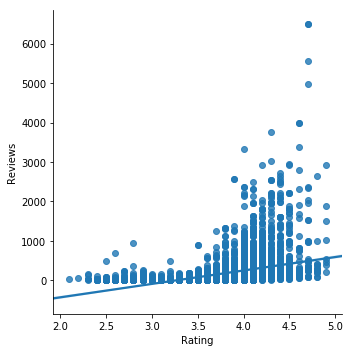

In [115]:
sns.lmplot(x='Rating',y='Reviews',data=df3)

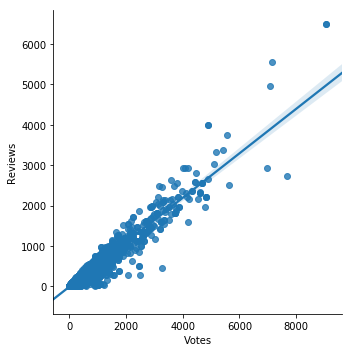

In [116]:
sns.lmplot(x='Votes',y='Reviews',data=df3)

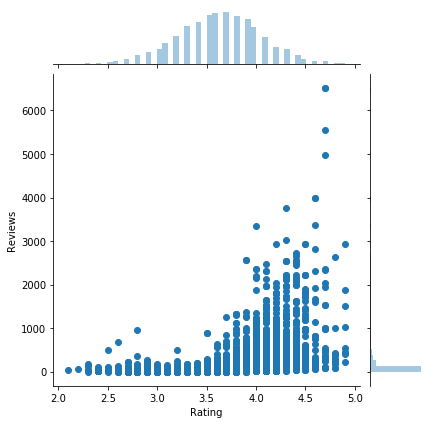

In [111]:
sns.jointplot(x='Rating',y='Reviews',data=df3)

In [121]:
df3.to_csv("C:/Users/sylve/Downloads/Machine learning/Dataset/Project datasets modified/Predicting Food Delivery Time Hackathon/new_Data_train.csv")